# which features to keep for model buiding

In [194]:
df_S.head()

,credit,SEX,default,AGE,MARRIAGE,EDUCATION_graduate school,EDUCATION_university,EDUCATION_high school,PAY_2,BILL_AMT5,PAY_AMT6
0,20000,0,1,24,1,0,1,0,2,0,0
1,120000,0,1,26,2,0,1,0,2,3455,2000
2,90000,0,0,34,2,0,1,0,0,14948,5000
3,50000,0,0,37,1,0,1,0,0,28959,1000
4,50000,1,0,57,1,0,1,0,0,19146,679


In [195]:
df_S.to_csv('creditML.csv', index = False)

In [196]:
df = pd.read_csv('creditML.csv') 

## import libraries 

In [1]:
# import libraries 

import pandas as pd
import numpy as np

from pandas import Series, DataFrame

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Set default matplot figure size
### NameError: name 'pylab' is not defined: pylab.rcParams['figure.figsize'] = (7.0, 7.0)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Set text size 
mpl.rcParams['font.size'] = 12

In [2]:
df = pd.read_csv('creditEDA.csv') 

In [ ]:
## default was                            ## default is 
not default    23364                       0    23364  
default         6636                       1     6636    
    
## SEX was                                 ## SEX is
female    18112                            0    18112
male      11888                            1    11888

## EDUCATION --4 dummies                        ## education
university         14030                         3    14030
graduate school    10585                         0    10585
high school         4917                         1     4917
other                468                         2      468

In [3]:
df.columns

Index(['credit', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'education',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

In [4]:
df.head()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,3,0,0,0,1
1,120000,0,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,3,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,3,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,3,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,3,0,0,0,1


In [5]:
df.dtypes

credit                       int64
SEX                          int64
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
PAY_AMT1                     int64
PAY_AMT2                     int64
PAY_AMT3                     int64
PAY_AMT4                     int64
PAY_AMT5                     int64
PAY_AMT6                     int64
default                      int64
education                    int64
EDUCATION_graduate school    int64
EDUCATION_high school        int64
EDUCATION_other              int64
EDUCATION_university         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   credit                     30000 non-null  int64
 1   SEX                        30000 non-null  int64
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   PAY_0                      30000 non-null  int64
 5   PAY_2                      30000 non-null  int64
 6   PAY_3                      30000 non-null  int64
 7   PAY_4                      30000 non-null  int64
 8   PAY_5                      30000 non-null  int64
 9   PAY_6                      30000 non-null  int64
 10  BILL_AMT1                  30000 non-null  int64
 11  BILL_AMT2                  30000 non-null  int64
 12  BILL_AMT3                  30000 non-null  int64
 13  BILL_AMT4                  30000 non-null  int64
 14  BILL_AMT5             

In [7]:
df.describe()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,1.598100,0.352833,0.163900,0.015600,0.467667
std,129747.661567,0.489129,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,1.371656,0.477859,0.370191,0.123924,0.498962
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# EDA 

## histogram-- equal numbers of bin

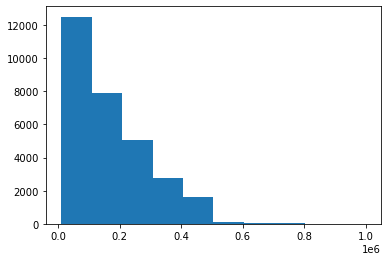

In [8]:
plt.hist(df['credit'])
plt.show()

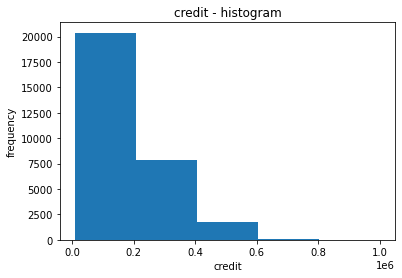

In [9]:
plt.hist(df['credit'], bins=5)

plt.title('credit - histogram')
plt.xlabel('credit')
plt.ylabel('frequency')

plt.show()

In [77]:
df = df['credit'].dropna()
# Drop missing values for the records in which credit is missing

C:\Users\Dongmei\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of credit')

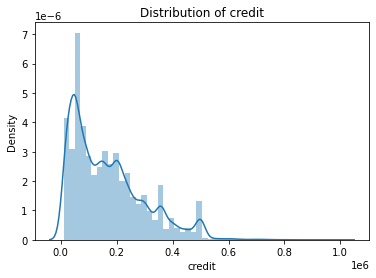

In [78]:
df_dist = sns.distplot(df)
df_dist.set_title("Distribution of credit")

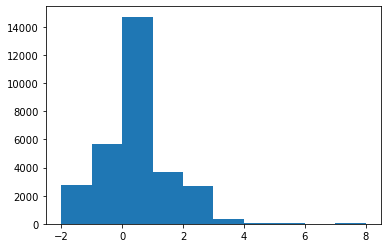

In [10]:
plt.hist(df['PAY_0'])
plt.show()

##-1: Paid in full; 
## 0: The use of revolving credit; 
## 1 = payment delay for one month; 
## 2 = payment delay for two months; 
## . . . 
## 8 = payment delay for eight months; 
## 9 = payment delay for nine months and above.

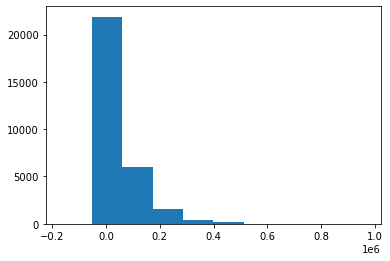

In [12]:
plt.hist(df['BILL_AMT1'])
plt.show()

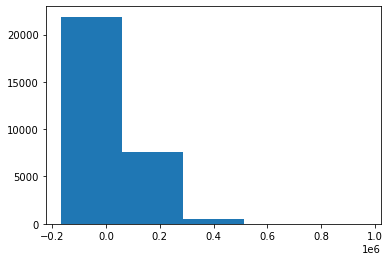

In [11]:
plt.hist(df['BILL_AMT1'], bins=5)
plt.show()

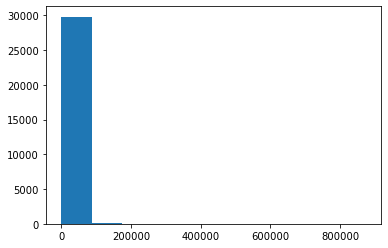

In [13]:
plt.hist(df['PAY_AMT1'])
plt.show()

In [ ]:
plt.hist(df['PAY_AMT1'], bins=5)
plt.show()

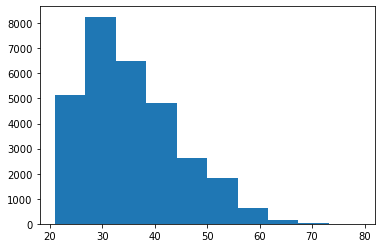

In [14]:
plt.hist(df['AGE'])
plt.show()

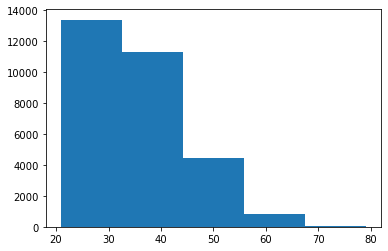

In [15]:
plt.hist(df['AGE'], bins=5)
plt.show()

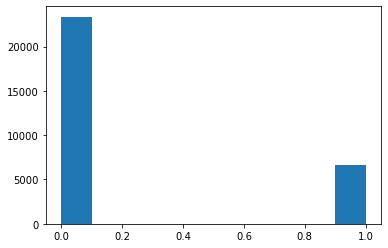

In [16]:
plt.hist(df['default'])
plt.show()

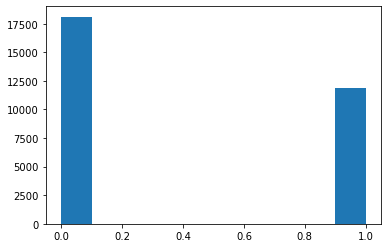

In [17]:
plt.hist(df['SEX'])
plt.show()

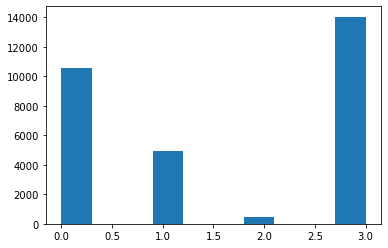

In [18]:
plt.hist(df['education'])   ###  0 graduate school 1 high school 2 other 3 univeristy
plt.show()

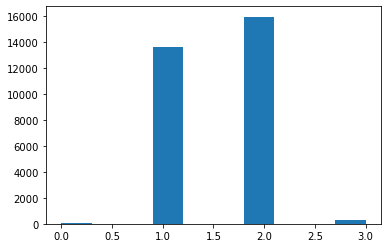

In [19]:
plt.hist(df['MARRIAGE'])   ###  0 other 1  married, 2 single 3 divorce
plt.show()

## line plot
#### tcredit by features: sex,EDUCATION, default, AGE, marriage, PAY_0, BILL_AMT1, PAY_AMT1

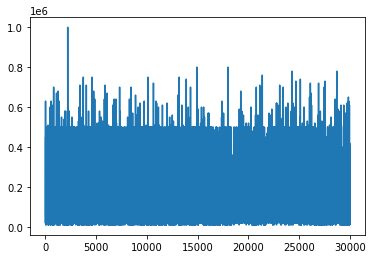

In [20]:
plt.plot(df['credit'])
plt.show() 

In [ ]:
## https://seaborn.pydata.org/generated/seaborn.lineplot.html

### sns.lineplot(data=may_flights, x="year", y="passengers")
### sns.lineplot(data=flights, x="year", y="passengers")

<AxesSubplot:xlabel='default', ylabel='credit'>

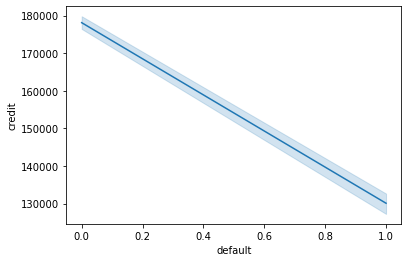

In [21]:
 sns.lineplot(data=df, x="default", y="credit")

C:\Users\Dongmei\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


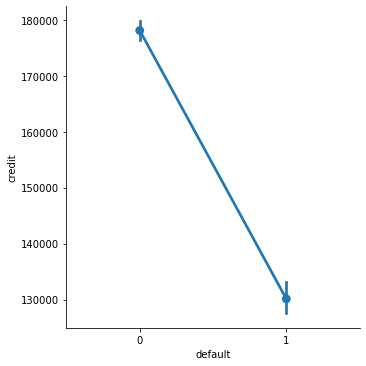

In [22]:
## 
sns.factorplot(x='default', y='credit', data=df)

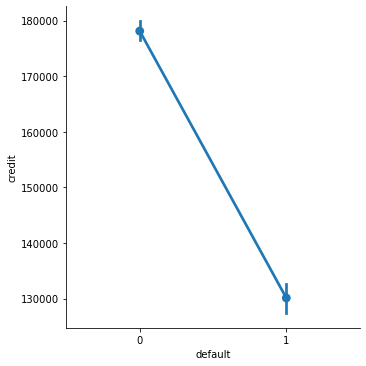

In [23]:
sns.catplot(x='default', y='credit', kind='point', data=df)

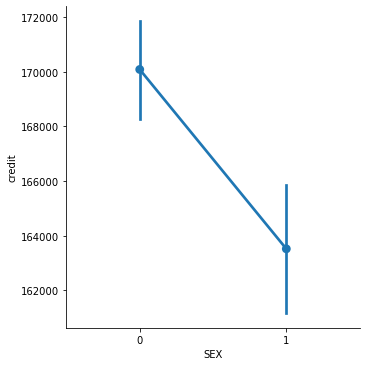

In [104]:
sns.catplot(x='SEX', y='credit', kind='point', data=df)

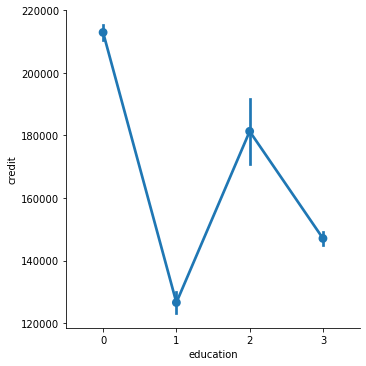

In [105]:
sns.catplot(x='education', y='credit', kind='point', data=df)

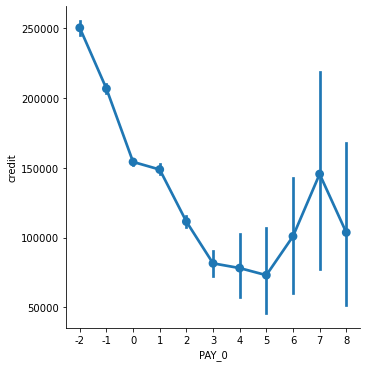

In [106]:
sns.catplot(x='PAY_0', y='credit', kind='point', data=df)

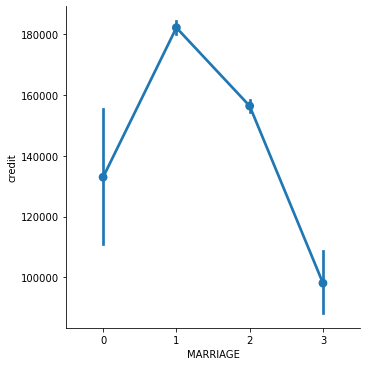

In [107]:
sns.catplot(x='MARRIAGE', y='credit', kind='point', data=df)

##  1 = married; 2 = single; 3 = divorce; 0=others).

<AxesSubplot:xlabel='PAY_0', ylabel='credit'>

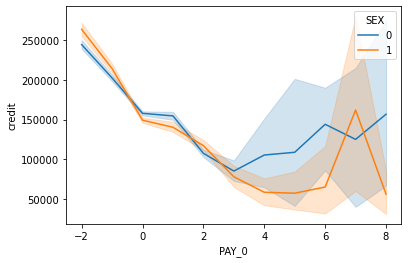

In [24]:
sns.lineplot(data=df, x="PAY_0", y="credit", hue="SEX")

<AxesSubplot:xlabel='PAY_0', ylabel='credit'>

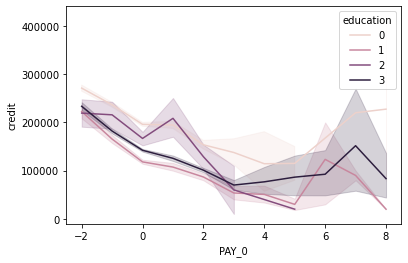

In [25]:
sns.lineplot(data=df, x="PAY_0", y="credit", hue="education")

<AxesSubplot:xlabel='PAY_0', ylabel='credit'>

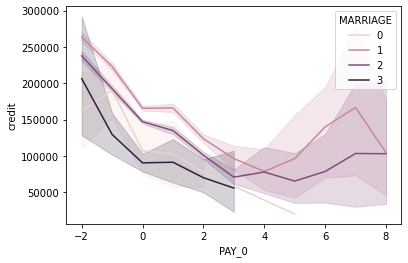

In [26]:
sns.lineplot(data=df, x="PAY_0", y="credit", hue="MARRIAGE")

<AxesSubplot:xlabel='PAY_0', ylabel='credit'>

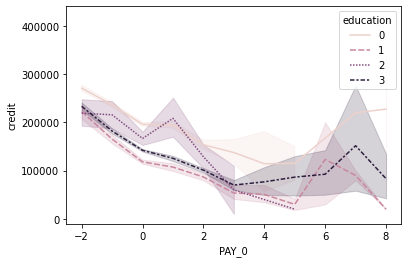

In [27]:
sns.lineplot(data=df, x="PAY_0", y="credit", hue="education", style="education")

<AxesSubplot:xlabel='PAY_0', ylabel='credit'>

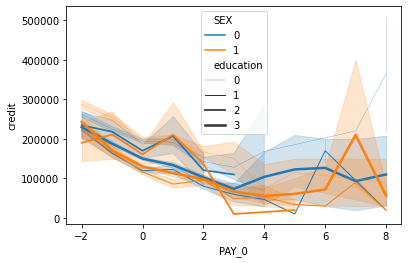

In [28]:
sns.lineplot(
    data=df, x="PAY_0", y="credit",
    size="education", hue="SEX",
    sizes=(.25, 2.5)
)

In [ ]:
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)

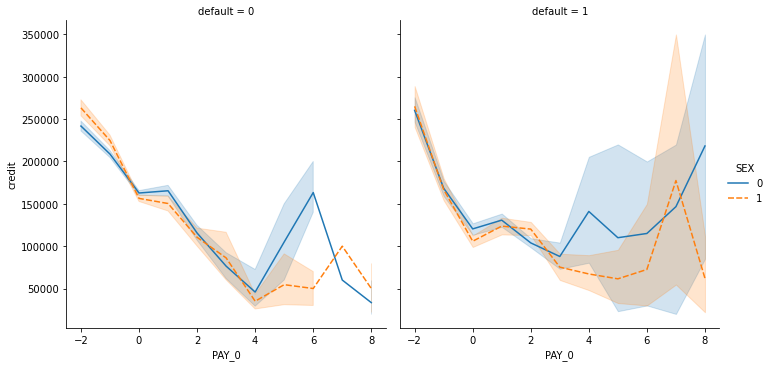

In [29]:
sns.relplot(
    data=df, x="PAY_0", y="credit",
    col="default", hue="SEX", style="SEX",
    kind="line"
)

In [30]:
df.columns

Index(['credit', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'education',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

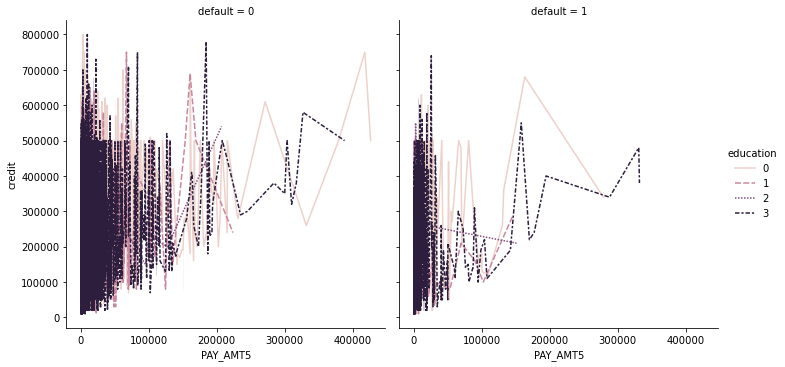

In [32]:
sns.relplot(
    data=df, x="PAY_AMT5", y="credit",
    col="default", hue="education", style="education",
    kind="line"
)

In [ ]:
#### the above : https://seaborn.pydata.org/generated/seaborn.lineplot.html

#### https://github.com/hoffm386/eda-with-categorical-variables
## EDA with Categorical Variables

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

### Numeric vs. Categorical EDA
##### Multiple Histograms---- by default. also by sex, educaiton, marriage?

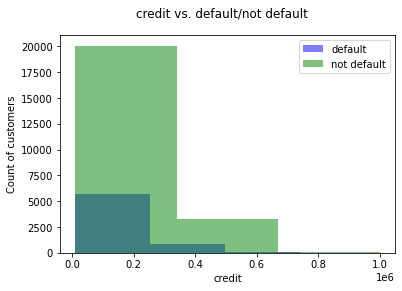

In [34]:
fig, ax = plt.subplots()

ax.hist(df[df["default"]==1]["credit"], bins=3, alpha=0.5, color="blue", label="default")
ax.hist(df[df["default"]==0]["credit"], bins=3, alpha=0.5, color="green", label="not default")

ax.set_xlabel("credit")
ax.set_ylabel("Count of customers")

fig.suptitle("credit vs. default/not default")

ax.legend();

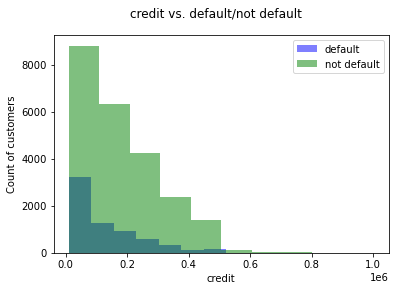

In [35]:
fig, ax = plt.subplots()

ax.hist(df[df["default"]==1]["credit"], alpha=0.5, color="blue", label="default")
ax.hist(df[df["default"]==0]["credit"], alpha=0.5, color="green", label="not default")

ax.set_xlabel("credit")
ax.set_ylabel("Count of customers")

fig.suptitle("credit vs. default/not default")

ax.legend();

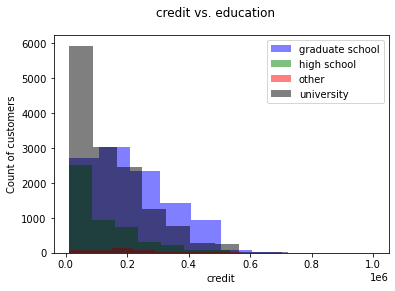

In [36]:
fig, ax = plt.subplots()

ax.hist(df[df["education"]==0]["credit"], alpha=0.5, color="blue", label="graduate school")
ax.hist(df[df["education"]==1]["credit"], alpha=0.5, color="green", label="high school")
ax.hist(df[df["education"]==2]["credit"], alpha=0.5, color="red", label="other")
ax.hist(df[df["education"]==3]["credit"], alpha=0.5, color="black", label="university")

ax.set_xlabel("credit")
ax.set_ylabel("Count of customers")

fig.suptitle("credit vs. education")

ax.legend();

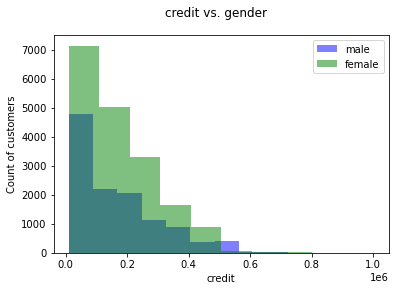

In [57]:
fig, ax = plt.subplots()

ax.hist(df[df["SEX"]==1]["credit"], alpha=0.5, color="blue", label="male")
ax.hist(df[df["SEX"]==0]["credit"], alpha=0.5, color="green", label="female")

ax.set_xlabel("credit")
ax.set_ylabel("Count of customers")

fig.suptitle("credit vs. gender")

ax.legend();

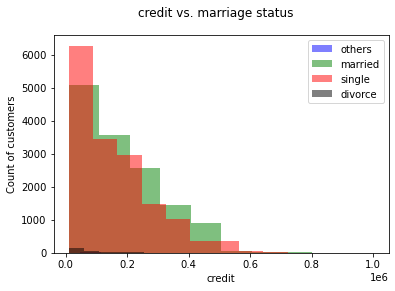

In [58]:
fig, ax = plt.subplots()

ax.hist(df[df["MARRIAGE"]==0]["credit"], alpha=0.5, color="blue", label="others")
ax.hist(df[df["MARRIAGE"]==1]["credit"], alpha=0.5, color="green", label="married")
ax.hist(df[df["MARRIAGE"]==2]["credit"], alpha=0.5, color="red", label="single")
ax.hist(df[df["MARRIAGE"]==3]["credit"], alpha=0.5, color="black", label="divorce")

ax.set_xlabel("credit")
ax.set_ylabel("Count of customers")

fig.suptitle("credit vs. marriage status")

ax.legend();

#### Multiple Density Estimate Plots

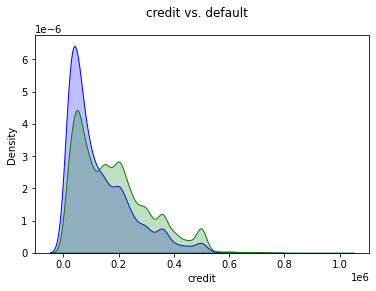

In [37]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["default"]==1]["credit"], shade=True, color="blue", label="default", ax=ax)
sns.kdeplot(df[df["default"]==0]["credit"], shade=True, color="green", label="not default", ax=ax)

ax.set_xlabel("credit")
ax.set_ylabel("Density")

fig.suptitle("credit vs. default");

## where is my label? 

In [38]:
df.columns

Index(['credit', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'education',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

In [39]:
df['education'].value_counts()  ## 3 univeristy 0 graduate school  1 high school

3    14030
0    10585
1     4917
2      468
Name: education, dtype: int64

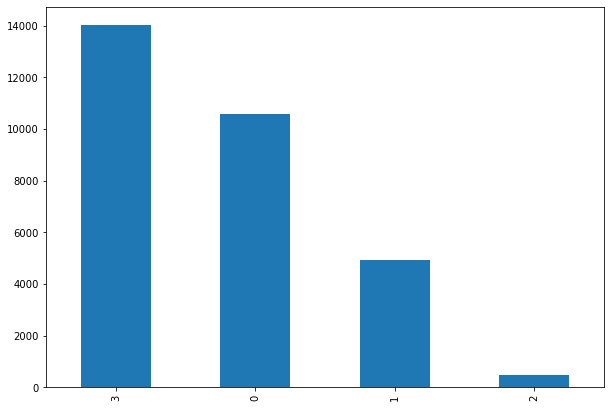

In [40]:
ax = df['education'].value_counts().plot(kind='bar', figsize=(10,7))

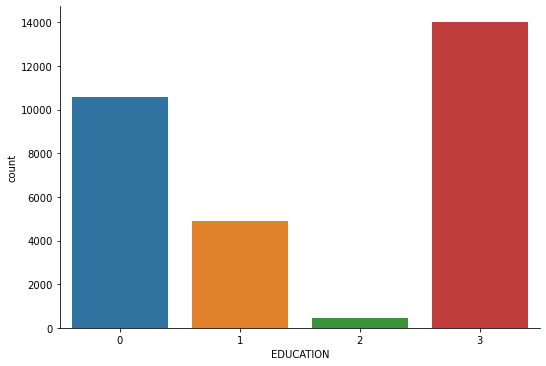

In [41]:
fg = sns.catplot(x='education', data=df, kind='count', aspect=1.5)
fg.set_xlabels('EDUCATION')


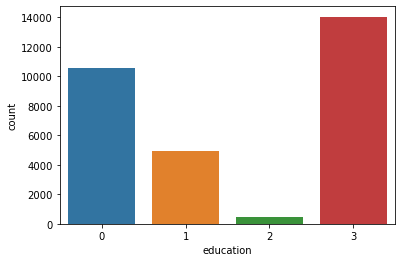

In [42]:
ax = sns.countplot(x="education", data=df)
## https://seaborn.pydata.org/generated/seaborn.countplot.html

In [43]:
df['SEX'].value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
fg = sns.catplot(x='SEX', data=df, kind='count', aspect=1.5)
fg.set_xlabels('SEX')

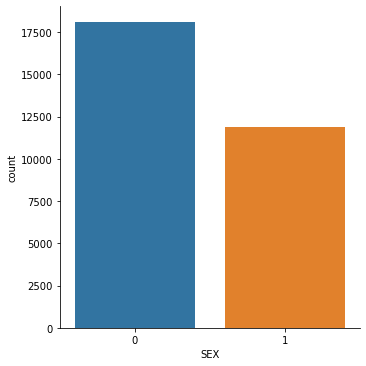

In [45]:
fg = sns.catplot(x='SEX', data=df, kind='count')
fg.set_xlabels('SEX')

C:\Users\Dongmei\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


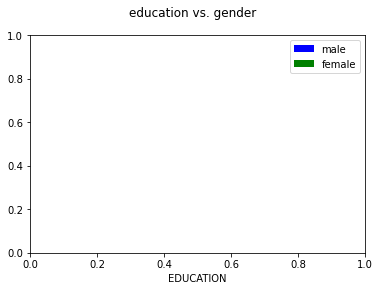

In [46]:
fig, ax = plt.subplots()

sns.catplot(x="education", hue="SEX", data=df, kind="count", 
            palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("EDUCATION")

color_patches = [
    Patch(facecolor="blue", label="male"),
    Patch(facecolor="green", label="female")
]
ax.legend(handles=color_patches)

fig.suptitle("education vs. gender");


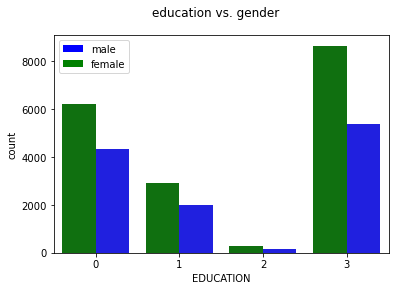

In [48]:
fig, ax = plt.subplots()

sns.countplot(x="education", hue="SEX", data=df, 
            palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("EDUCATION")

color_patches = [
    Patch(facecolor="blue", label="male"),
    Patch(facecolor="green", label="female")
]
ax.legend(handles=color_patches)

fig.suptitle("education vs. gender");


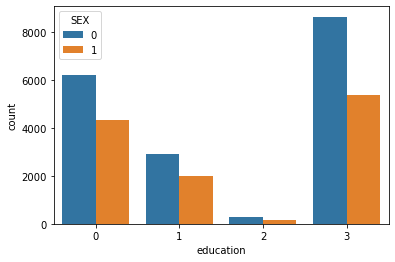

In [49]:
ax = sns.countplot(x="education", hue="SEX", data=df)
## https://seaborn.pydata.org/generated/seaborn.countplot.html

In [ ]:
sns.catplot(x= 'education', data=df, kind='count', hue='SEX', aspect=2)

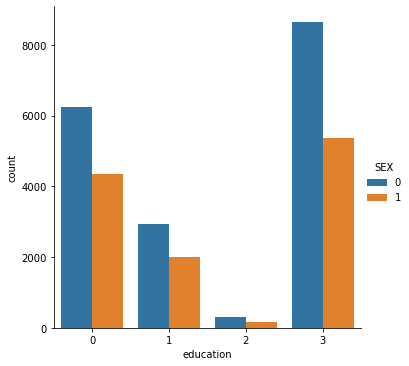

In [50]:
sns.catplot(x= 'education', data=df, kind='count', hue='SEX')

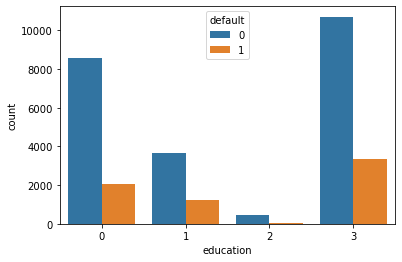

In [66]:
ax = sns.countplot(x="education", hue="default", data=df)

C:\Users\Dongmei\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


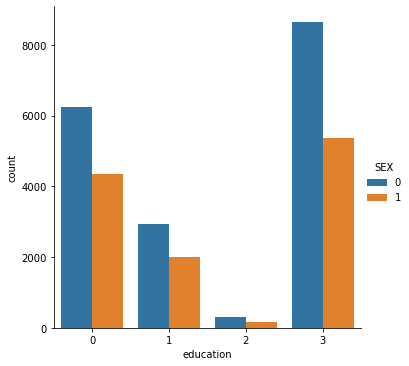

In [67]:
sns.catplot(x="education", hue="SEX", data=df, kind="count", ax=ax)

In [ ]:
ax = sns.countplot(y="EDUCATION", hue="SEX", data=df)

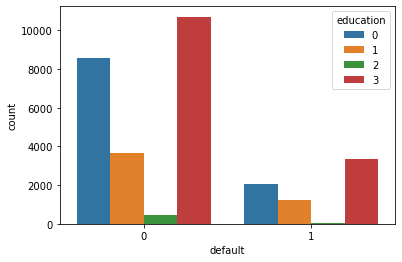

In [51]:
ax = sns.countplot(x="default", hue="education", data=df)  ### 3 high school

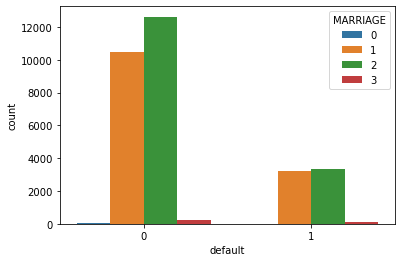

In [52]:
ax = sns.countplot(x="default", hue="MARRIAGE", data=df)

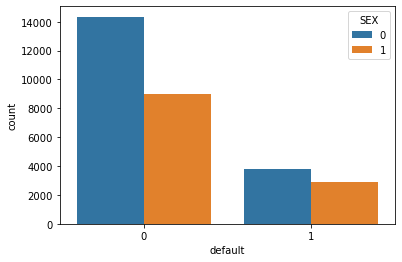

In [53]:
ax = sns.countplot(x="default", hue="SEX", data=df)

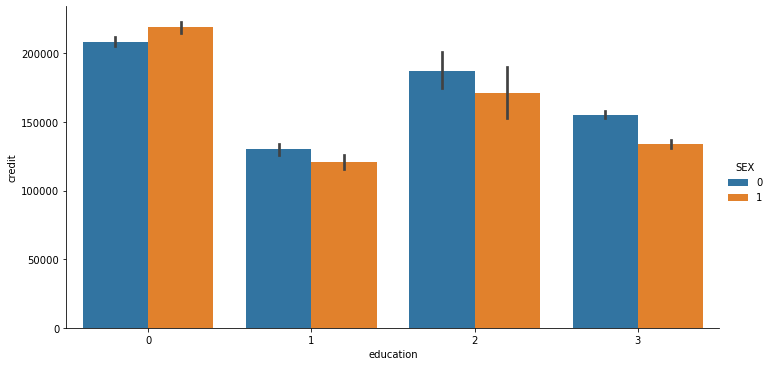

In [60]:
sns.catplot(x= 'education', y='credit', data=df, kind='bar', hue='SEX', aspect=2)

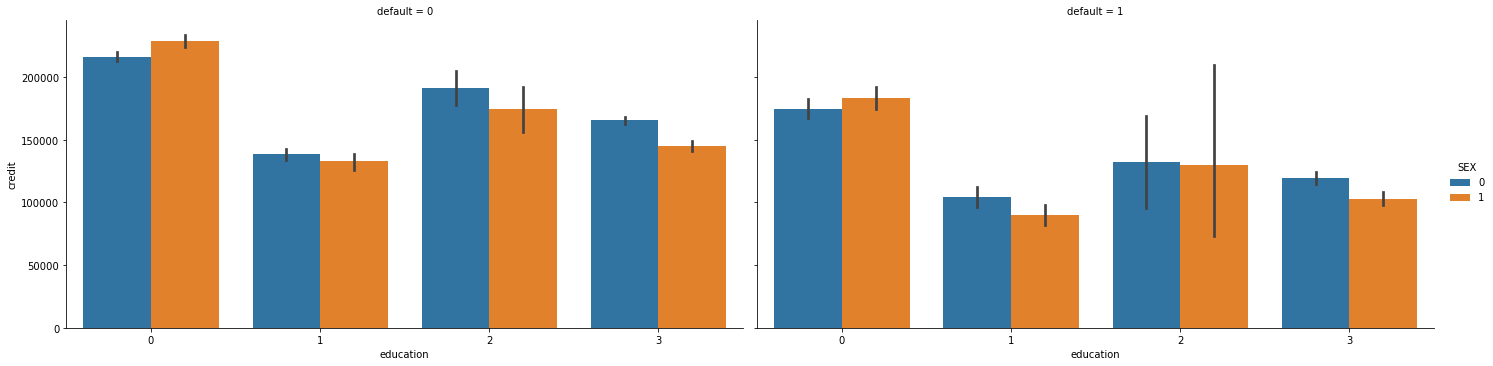

In [61]:
sns.catplot(x='education', y='credit', data=df, kind='bar', hue='SEX', col='default', aspect=2)

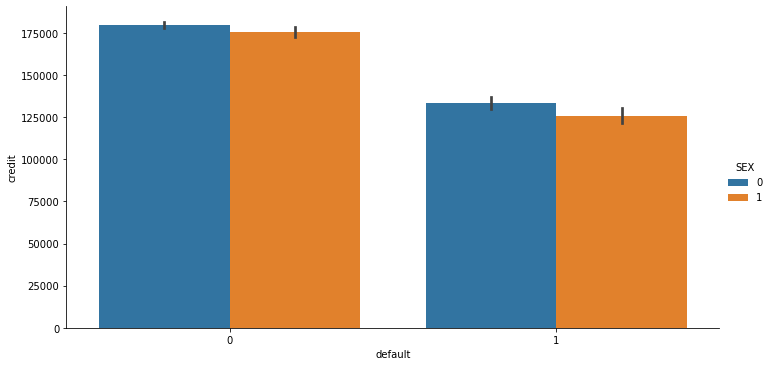

In [62]:
sns.catplot(x='default', y='credit', data=df, kind='bar', hue='SEX', aspect=2)

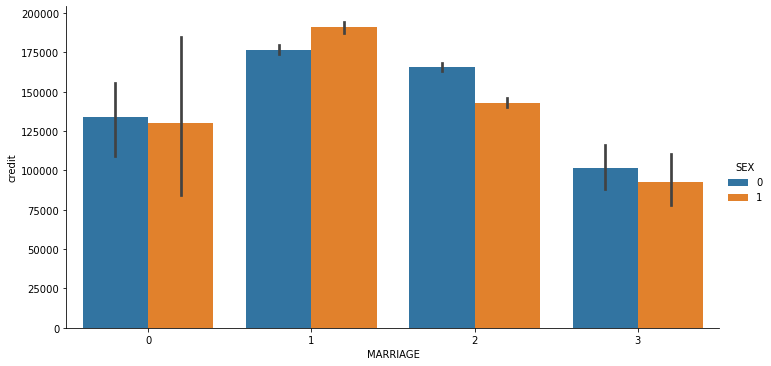

In [63]:
sns.catplot(x='MARRIAGE', y='credit', data=df, kind='bar', hue='SEX', aspect=2)

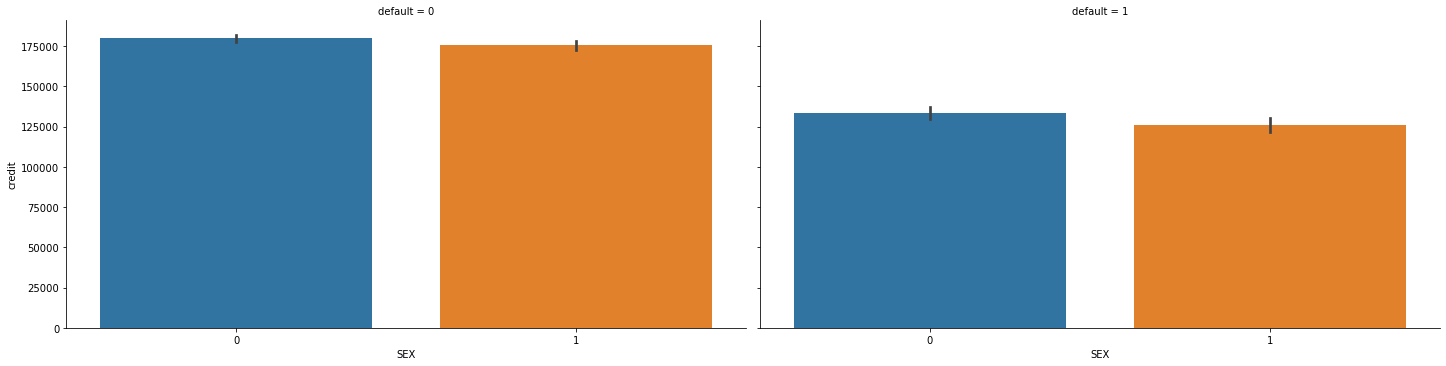

In [64]:
sns.catplot(x='SEX', y='credit', data=df, kind='bar', col='default', aspect=2)

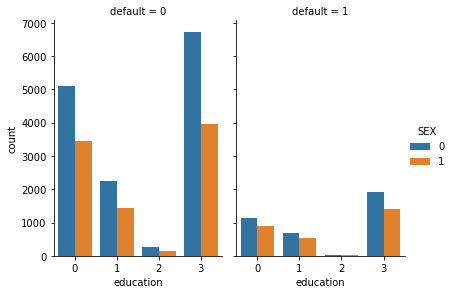

In [69]:
g = sns.catplot(x="education", hue="SEX", col="default",
                data=df, kind="count",
                height=4, aspect=.7);

In [70]:
counts_df = df.groupby(["education", "default"])["SEX"].count().unstack()
counts_df

default,0,1
education,,
0,8549,2036
1,3680,1237
2,435,33
3,10700,3330


In [71]:
default_percents_df = counts_df.T.div(counts_df.T.sum()).T
default_percents_df

default,0,1
education,,
0,0.807652,0.192348
1,0.748424,0.251576
2,0.929487,0.070513
3,0.762651,0.237349


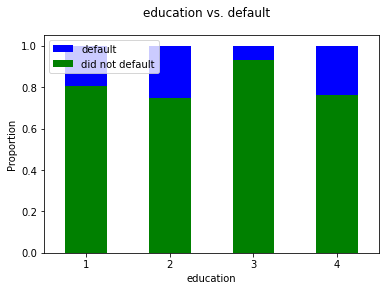

In [73]:
fig, ax = plt.subplots()

default_percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("education")
ax.set_xticklabels([1, 2, 3, 4], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="default"),
    Patch(facecolor="green", label="did not default")
]
ax.legend(handles=color_patches)

fig.suptitle("education vs. default");

In [74]:
df.describe()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,1.598100,0.352833,0.163900,0.015600,0.467667
std,129747.661567,0.489129,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,1.371656,0.477859,0.370191,0.123924,0.498962
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df.credit.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: credit, dtype: float64

In [75]:
print('Average and median credit are %0.f and %0.f, respectively'%(df.credit.mean(), 
                                                                          df.credit.median()))

Average and median credit are 167484 and 140000, respectively


In [86]:
df.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: credit, dtype: int64

In [87]:
df = pd.read_csv('creditEDA.csv') 

In [88]:
df.columns

Index(['credit', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'education',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

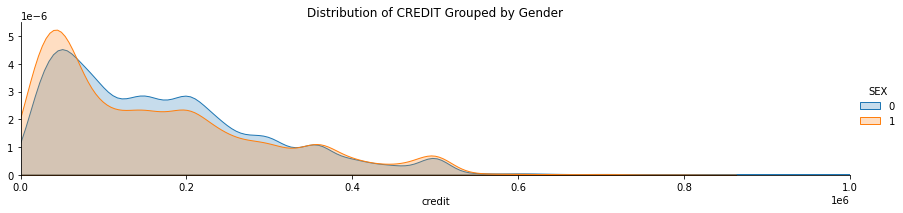

In [89]:
fig = sns.FacetGrid(df, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'credit', shade=True)
oldest = df['credit'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of CREDIT Grouped by Gender')
fig.add_legend()

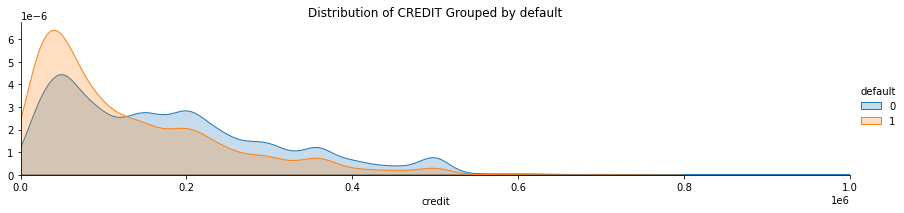

In [90]:
fig = sns.FacetGrid(df, hue='default', aspect=4)
fig.map(sns.kdeplot, 'credit', shade=True)
oldest = df['credit'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of CREDIT Grouped by default')
fig.add_legend()

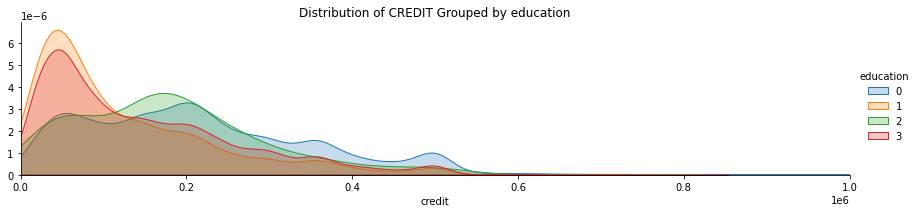

In [91]:
fig = sns.FacetGrid(df, hue='education', aspect=4)
fig.map(sns.kdeplot, 'credit', shade=True)
oldest = df['credit'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of CREDIT Grouped by education')
fig.add_legend()

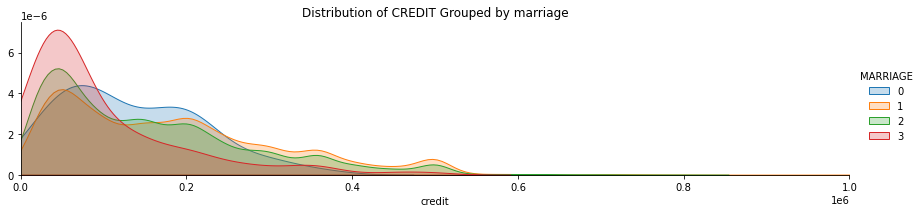

In [94]:
fig = sns.FacetGrid(df, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'credit', shade=True)
oldest = df['credit'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of CREDIT Grouped by marriage')
fig.add_legend()

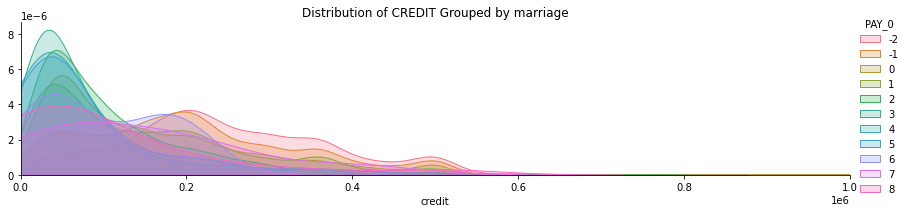

In [100]:
fig = sns.FacetGrid(df, hue='PAY_0', aspect=4)
fig.map(sns.kdeplot, 'credit', shade=True)
oldest = df['credit'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of CREDIT Grouped by marriage')
fig.add_legend()

C:\Users\Dongmei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


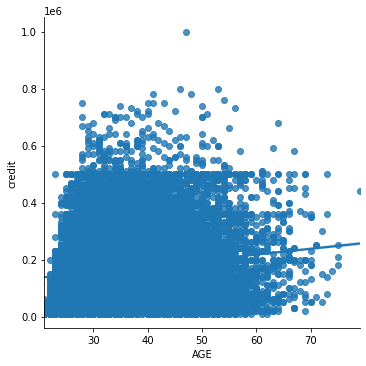

In [95]:
sns.lmplot('AGE', 'credit', data=df)

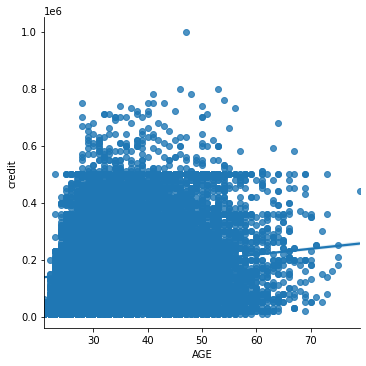

In [96]:
sns.lmplot(x='AGE', y='credit', data=df)  ## address the warning 

C:\Users\Dongmei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


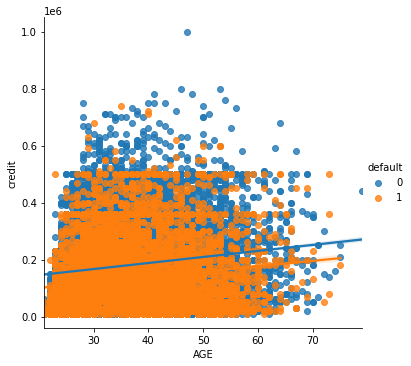

In [97]:
sns.lmplot('AGE', 'credit', data=df, hue='default')

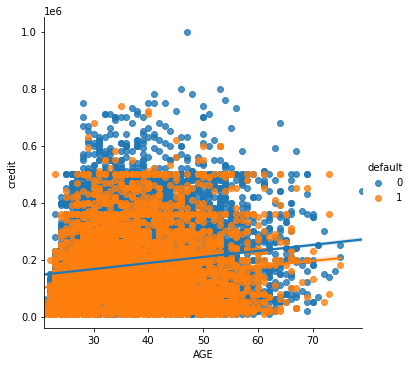

In [98]:
sns.lmplot(x='AGE', y='credit', data=df, hue='default')

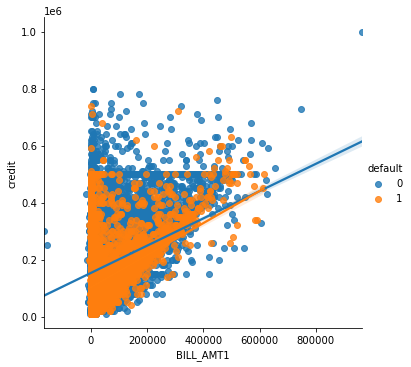

In [101]:
sns.lmplot(x='BILL_AMT1', y='credit', data=df, hue='default')

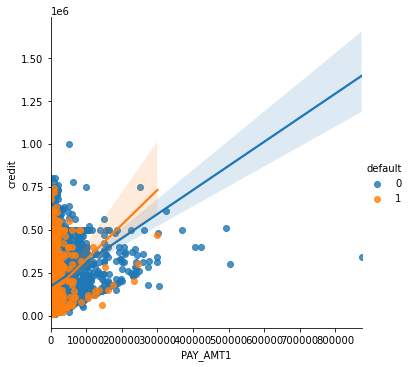

In [102]:
sns.lmplot(x='PAY_AMT1', y='credit', data=df, hue='default')

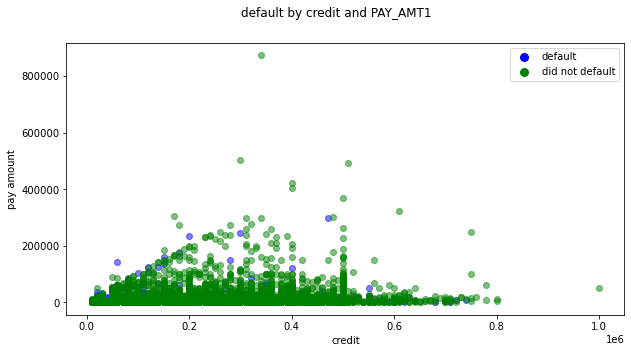

In [109]:
## Numeric vs. Numeric vs. Categorical EDA

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["default"]==1]["credit"], df[df["default"]==1]["PAY_AMT1"], c="blue", alpha=0.5)
ax.scatter(df[df["default"]==0]["credit"], df[df["default"]==0]["PAY_AMT1"], c="green", alpha=0.5)

ax.set_xlabel("credit")
ax.set_ylabel("pay amount")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='default', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not default', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("default by credit and PAY_AMT1");

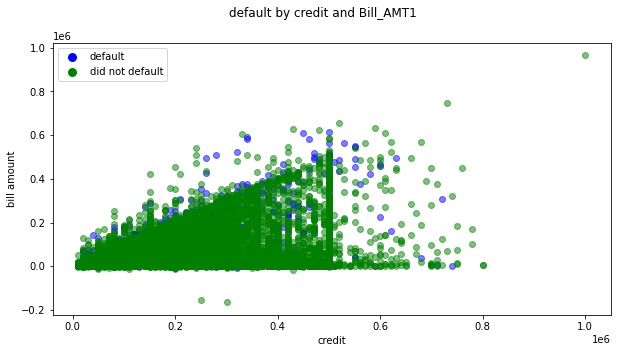

In [110]:
## Numeric vs. Numeric vs. Categorical EDA

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["default"]==1]["credit"], df[df["default"]==1]["BILL_AMT1"], c="blue", alpha=0.5)
ax.scatter(df[df["default"]==0]["credit"], df[df["default"]==0]["BILL_AMT1"], c="green", alpha=0.5)

ax.set_xlabel("credit")
ax.set_ylabel("bill amount")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='default', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not default', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("default by credit and Bill_AMT1");

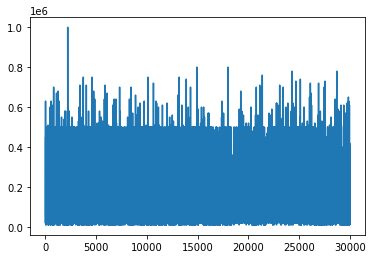

In [111]:
plt.plot(df['credit'])
plt.show()

In [114]:
x = df['BILL_AMT1']
y = df['credit']

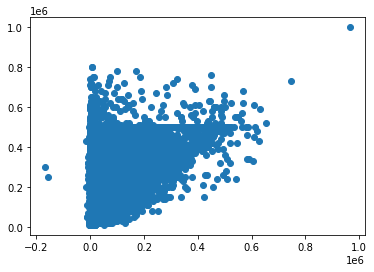

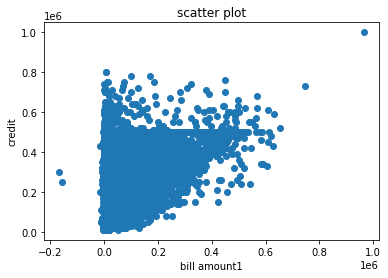

In [115]:
plt.scatter(x,y)
plt.show()

plt.scatter(x,y, marker='o')
plt.title('scatter plot')
plt.xlabel('bill amount1')
plt.ylabel('credit')
plt.show()

In [116]:
x = df['BILL_AMT4']
y = df['credit']

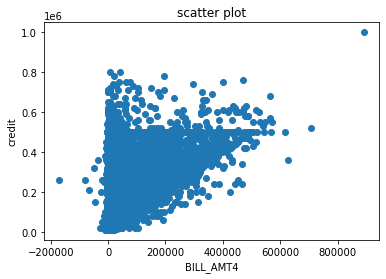

In [117]:
plt.scatter(x,y, marker='o')
plt.title('scatter plot')
plt.xlabel('BILL_AMT4')
plt.ylabel('credit')
plt.show()

In [119]:
x = df['PAY_AMT6']
y = df['credit']

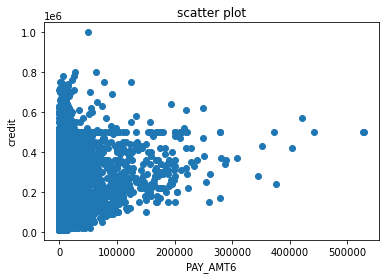

In [120]:
plt.scatter(x,y, marker='o')
plt.title('scatter plot')
plt.xlabel('PAY_AMT6')
plt.ylabel('credit')
plt.show()

In [121]:
df.columns

Index(['credit', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'education',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

In [ ]:
## Covariance
### Covariance is often used to gauge the linear degree of change between two variables. 
### This will be very important when studying the impact various features might have on default rates

In [122]:
covMat = df.cov()
print(covMat)

                                 credit          SEX     MARRIAGE  \
credit                     1.683446e+10 -1571.050630 -7323.669658   
SEX                       -1.571051e+03     0.239247     0.008014   
MARRIAGE                  -7.323670e+03     0.008014     0.272452   
AGE                        1.730767e+05     0.409726    -1.992764   
PAY_0                     -3.954593e+04     0.031685     0.011683   
PAY_2                     -4.603765e+04     0.041442     0.015122   
PAY_3                     -4.443225e+04     0.038694     0.020421   
PAY_4                     -4.057181e+04     0.034411     0.020213   
PAY_5                     -3.667056e+04     0.030521     0.021074   
PAY_6                     -3.509308e+04     0.024754     0.020616   
BILL_AMT1                  2.727020e+09  1211.694332  -902.154685   
BILL_AMT2                  2.570130e+09  1085.595467  -802.517866   
BILL_AMT3                  2.548533e+09   833.207432  -901.679085   
BILL_AMT4                  2.45392

In [123]:
df.cov()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
credit,1.683446e+10,-1571.050630,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,-36670.562325,-35093.083441,...,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08,-8267.551759,-34930.604407,16044.482969,-6709.314796,215.785093,-9550.953266
SEX,-1.571051e+03,0.239247,0.008014,0.409726,0.031685,0.041442,0.038694,0.034411,0.030521,0.024754,...,7.403481e+01,1.708011e+01,1.245881e+01,2.405188e+01,0.008113,-0.018208,0.005317,0.001385,-0.000515,-0.006188
MARRIAGE,-7.323670e+03,0.008014,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,0.021074,0.020616,...,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01,-0.005273,-0.062974,0.035451,-0.021418,-0.000542,-0.013490
AGE,1.730767e+05,0.409726,-1.992764,84.969755,-0.408639,-0.553408,-0.585263,-0.535851,-0.562245,-0.517022,...,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03,0.053143,-0.261453,-0.442349,0.789120,0.010260,-0.357031
PAY_0,-3.954593e+04,0.031685,0.011683,-0.408639,1.262930,0.904330,0.772384,0.707972,0.648743,0.613292,...,-1.396168e+03,-1.126848e+03,-9.991077e+02,-1.172194e+03,0.151499,0.184394,-0.076644,0.024505,-0.003473,0.055612
PAY_2,-4.603765e+04,0.041442,0.015122,-0.553408,0.904330,1.433254,1.098371,0.926680,0.844886,0.792320,...,-1.178331e+03,-8.788439e+02,-6.784685e+02,-7.768350e+02,0.130960,0.238080,-0.096806,0.028625,-0.004913,0.073094
PAY_3,-4.443225e+04,0.038694,0.020421,-0.585263,0.772384,1.098371,1.432492,1.087761,0.931455,0.870815,...,-1.123429e+03,-8.637622e+02,-6.557960e+02,-7.630260e+02,0.116867,0.224645,-0.091629,0.027674,-0.005107,0.069062
PAY_4,-4.057181e+04,0.034411,0.020213,-0.535851,0.707972,0.926680,1.087761,1.366885,1.086161,0.963263,...,-1.425205e+03,-7.960357e+02,-5.999916e+02,-5.521373e+02,0.105115,0.209388,-0.085144,0.025268,-0.004491,0.064367
PAY_5,-3.667056e+04,0.030521,0.021074,-0.562245,0.648743,0.844886,0.931455,1.086161,1.284114,1.064545,...,1.808121e+02,-1.034962e+03,-5.771610e+02,-4.638926e+02,0.096020,0.187787,-0.075112,0.020798,-0.004047,0.058361
PAY_6,-3.509308e+04,0.024754,0.020616,-0.517022,0.613292,0.792320,0.870815,0.963263,1.064545,1.322472,...,1.181210e+02,3.426237e+02,-8.158327e+02,-5.172163e+02,0.089194,0.176146,-0.068759,0.017612,-0.005092,0.056240


In [ ]:
## corrrelation 

In [ ]:
corrMat = df.corr()
print(corrMat)
### from course site

In [126]:
df.corr()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
credit,1.000000,-0.024755,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,...,0.210167,0.203242,0.217202,0.219595,-0.153520,-0.196273,0.258777,-0.139686,0.013420,-0.147530
SEX,-0.024755,1.000000,0.031389,0.090874,0.057643,0.070771,0.066096,0.060173,0.055064,0.044008,...,0.008597,0.002229,0.001667,0.002766,0.039961,-0.027139,0.022750,0.007650,-0.008498,-0.025353
MARRIAGE,-0.108139,0.031389,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,...,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339,-0.087956,0.142129,-0.110845,-0.008386,-0.051797
AGE,0.144713,0.090874,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,...,0.029247,0.021379,0.022850,0.019478,0.013890,-0.020678,-0.100423,0.231252,0.008982,-0.077626
PAY_0,-0.271214,0.057643,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,...,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.119623,-0.142720,0.058902,-0.024937,0.099177
PAY_2,-0.296382,0.070771,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,...,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.144983,-0.169215,0.064590,-0.033118,0.122364
PAY_3,-0.286123,0.066096,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,...,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.136838,-0.160209,0.062461,-0.034435,0.115644
PAY_4,-0.267460,0.060173,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,...,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.130569,-0.152402,0.058382,-0.030998,0.110340
PAY_5,-0.249411,0.055064,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,...,0.009062,-0.058299,-0.033337,-0.023027,0.204149,0.120814,-0.138709,0.049577,-0.028822,0.103218
PAY_6,-0.235195,0.044008,0.034345,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,...,0.005834,0.019018,-0.046434,-0.025299,0.186866,0.111670,-0.125123,0.041370,-0.035733,0.098013


## based on correlatin coefficients
### select some columns/features for pairplots and regression 
### after regression, maybe make another round of selection

### target: credit 
### features: default, AGE, MARRIAGE, EDUCATION_graduate school
### features: PAY_2, BILL_AMT5, PAY_AMT6
### df_S selected

In [127]:
df_S = df[['credit','default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]

In [128]:
df_S.head()

,credit,default,AGE,MARRIAGE,EDUCATION_graduate school,PAY_2,BILL_AMT5,PAY_AMT6
0,20000,1,24,1,0,2,0,0
1,120000,1,26,2,0,2,3455,2000
2,90000,0,34,2,0,0,14948,5000
3,50000,0,37,1,0,0,28959,1000
4,50000,0,57,1,0,0,19146,679


In [131]:
df_S.corr()

,credit,default,AGE,MARRIAGE,EDUCATION_graduate school,PAY_2,BILL_AMT5,PAY_AMT6
credit,1.000000,-0.153520,0.144713,-0.108139,0.258777,-0.296382,0.295562,0.219595
default,-0.153520,1.000000,0.013890,-0.024339,-0.051328,0.263551,-0.006760,-0.053183
AGE,0.144713,0.013890,1.000000,-0.414170,-0.100423,-0.050148,0.049345,0.019478
MARRIAGE,-0.108139,-0.024339,-0.414170,1.000000,0.142129,0.024199,-0.025393,-0.006641
EDUCATION_graduate school,0.258777,-0.051328,-0.100423,0.142129,1.000000,-0.169215,0.000941,0.050135
PAY_2,-0.296382,0.263551,-0.050148,0.024199,-0.169215,1.000000,0.221348,-0.036500
BILL_AMT5,0.295562,-0.006760,0.049345,-0.025393,0.000941,0.221348,1.000000,0.164184
PAY_AMT6,0.219595,-0.053183,0.019478,-0.006641,0.050135,-0.036500,0.164184,1.000000


In [ ]:
## https://seaborn.pydata.org/generated/seaborn.heatmap.html
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
df_S = np.random.rand(10, 12)
ax = sns.heatmap(df_S)

## pairplots 

In [ ]:
### Pairplots in Python
### https://github.com/WillKoehrsen/Data-Analysis/blob/master/pairplots/Pair%20Plots.ipynb

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as n

# matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib

# Seaborn for pairplots
import seaborn as sns

In [ ]:
sns.pairplot(df_S);

In [ ]:
sns.pairplot(df_S, hue = 'default');

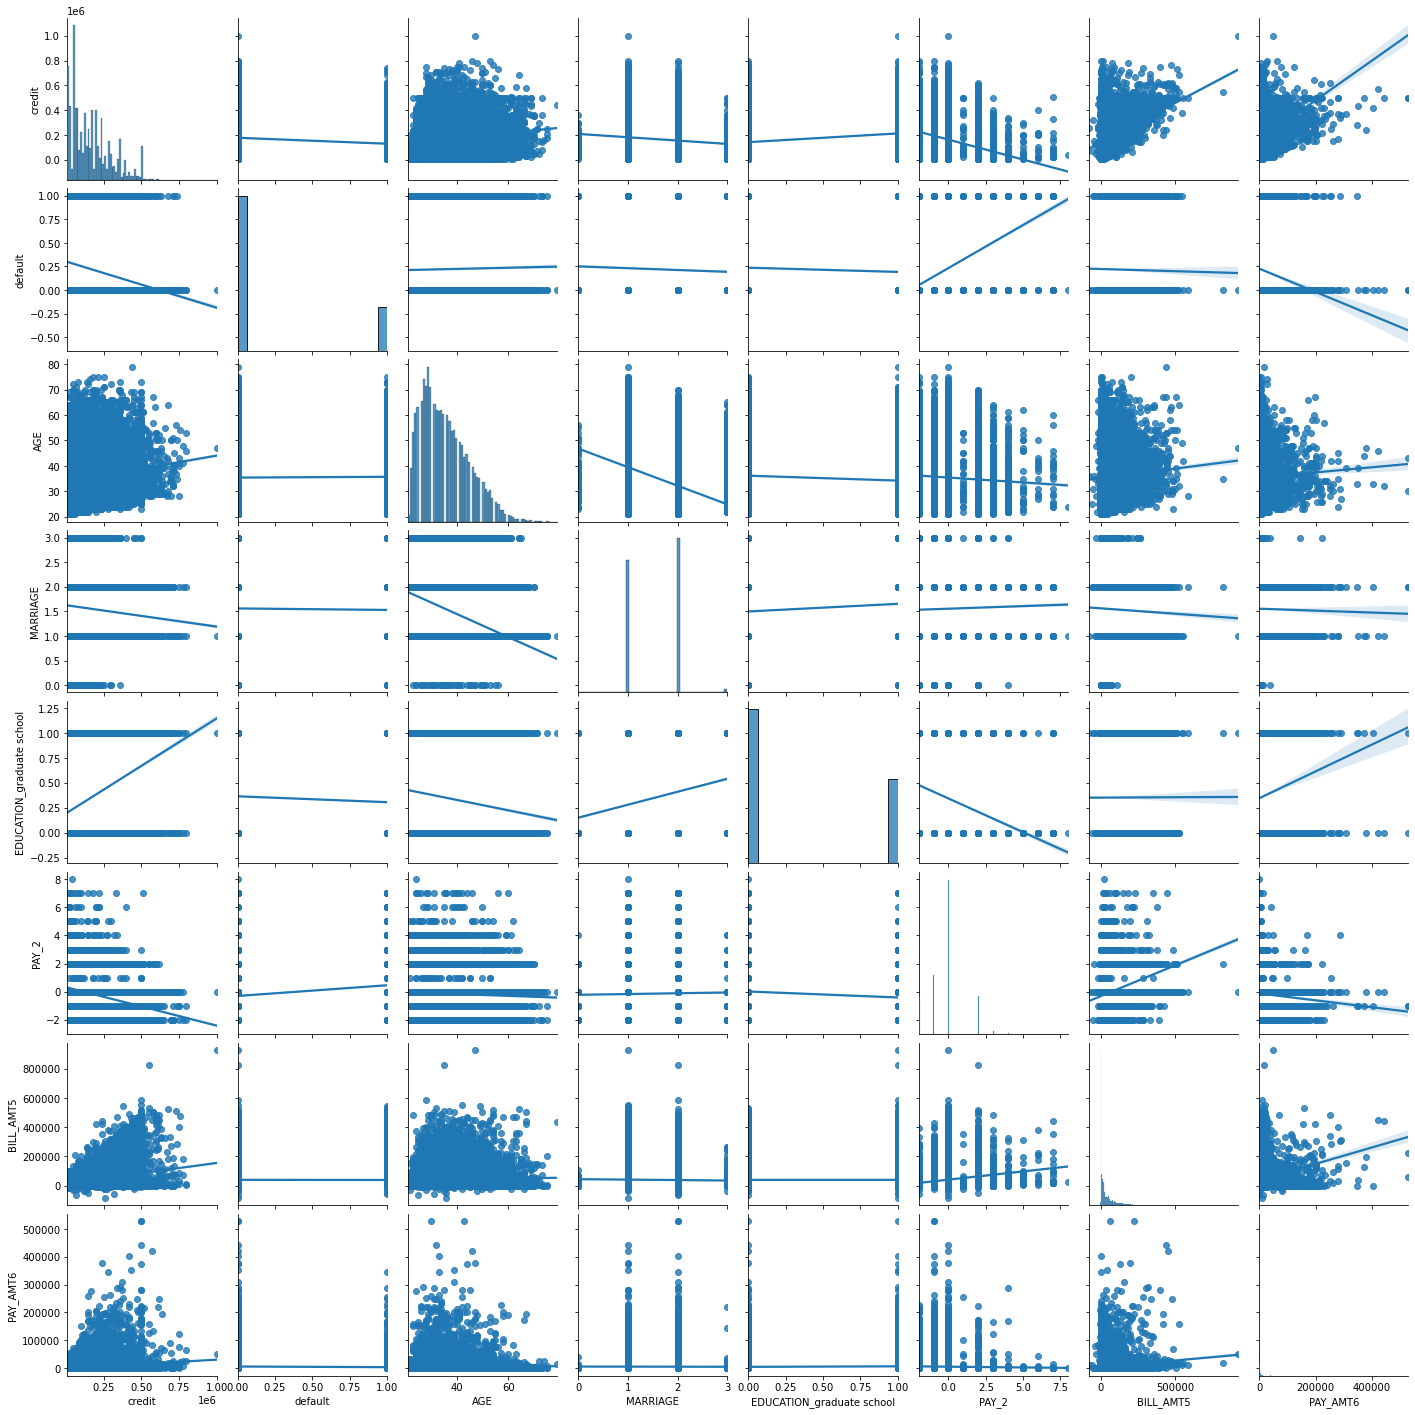

In [129]:
sns.pairplot(df_S, kind='reg');

## regression
### https://gist.github.com/rafiag

In [134]:
### 1. 
# Import libraries
## Basic libs

import pandas as pd
import numpy as np
import warnings

## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
## plt.rcParams['figure.figsize'] = (7, 7)
## plt.style.use('ggplot')

In [141]:
df.columns

Index(['credit', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'education',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')

In [142]:
df_S = df[['credit','default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]

In [143]:
df_S.columns

Index(['credit', 'default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school',
       'PAY_2', 'BILL_AMT5', 'PAY_AMT6'],
      dtype='object')

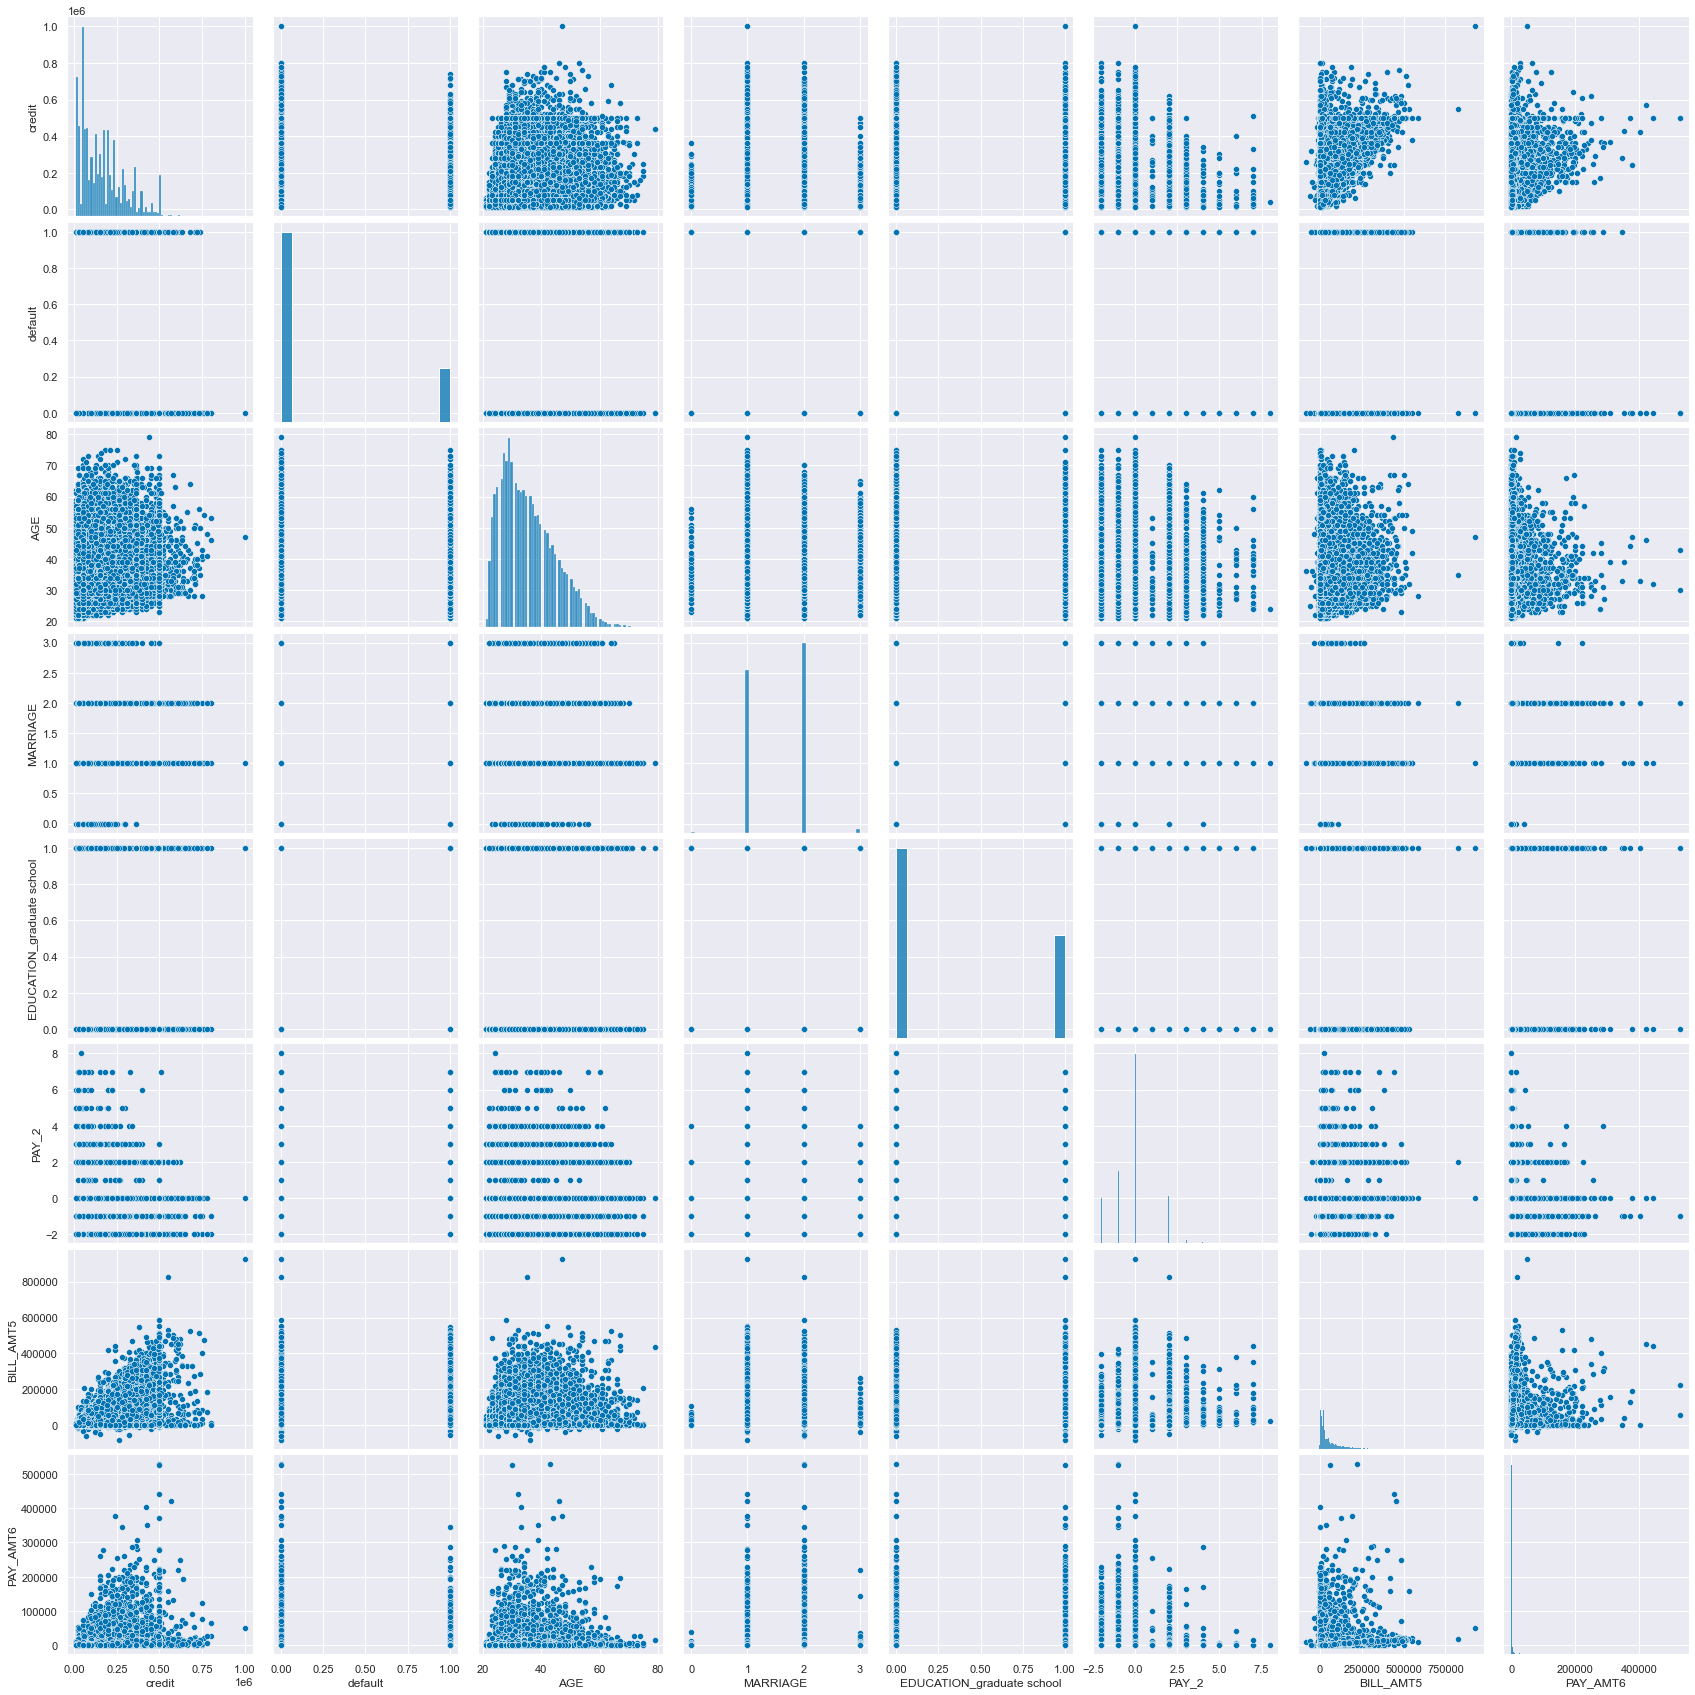

In [144]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_S, height=3)

In [146]:
df_S.head()

,credit,default,AGE,MARRIAGE,EDUCATION_graduate school,PAY_2,BILL_AMT5,PAY_AMT6
0,20000,1,24,1,0,2,0,0
1,120000,1,26,2,0,2,3455,2000
2,90000,0,34,2,0,0,14948,5000
3,50000,0,37,1,0,0,28959,1000
4,50000,0,57,1,0,0,19146,679


In [147]:
# Set independent and dependent variables
X = df_S[['default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]
y = df_S['credit']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 94769.42275890156
Coefficients: [-1.72921329e+04  1.38762803e+03 -2.06113069e+04  5.93366413e+04
 -3.32335318e+04  7.11394467e-01  1.00209978e+00]


#### y head = 94769 - default*1.7 + age*1.4 - marriage*2.1 + graduateschool*5.9 -pay_2*3.3 + billant5*7.1 + payamt6*1.0

In [158]:
### Model Validation

X = df_S[['default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_S['credit'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 credit   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1906.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        01:46:12   Log-Likelihood:            -3.9025e+05
No. Observations:               30000   AIC:                         7.805e+05
Df Residuals:                   29992   BIC:                         7.806e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [159]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.3078377586089446


In [160]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 1905.5544875152689
Probability of observing value at least as high as F-statistic: 0.0


In [161]:
## Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [162]:
print(olsmod.pvalues)

const                        1.160412e-120
default                       2.080158e-28
AGE                           9.066584e-77
MARRIAGE                      1.128408e-54
EDUCATION_graduate school     0.000000e+00
PAY_2                         0.000000e+00
BILL_AMT5                     0.000000e+00
PAY_AMT6                     3.350195e-171
dtype: float64


In [ ]:
## if independent variables have p-value less than 0.05
## it will show that there is sufficient evidence that they affects our credit

### regression Assumption Testing

In [163]:
df_S['credit_pred'] = olsmod.predict(X)
df_S['residual'] = olsmod.resid
df_S.head()


### Residual is the difference between the observed value and predicted value from our dataset.
##### With statsmodel we can easily get the residual value of our model by simply accesing the 
### .resid attribute of the model and then we can keep it in a new column called 'residual' in our df_pie dataframe.

,credit,default,AGE,MARRIAGE,EDUCATION_graduate school,PAY_2,BILL_AMT5,PAY_AMT6,credit_pred,residual
0,20000,1,24,1,0,2,0,0,23701.992178,-3701.992178
1,120000,1,26,2,0,2,3455,2000,10328.008811,109671.991189
2,90000,0,34,2,0,0,14948,5000,116370.585478,-26370.585478
3,50000,0,37,1,0,0,28959,1000,147103.725210,-97103.725210
4,50000,0,57,1,0,0,19146,679,167553.697905,-117553.697905


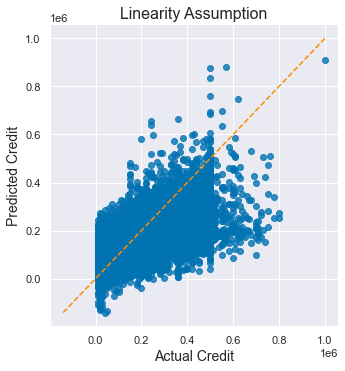

In [165]:
## Linearity test

# Plotting the observed vs predicted values
sns.lmplot(x='credit', y='credit_pred', data=df_S, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_S[['credit', 'credit_pred']].min().min()-10, 
                        df_S[['credit', 'credit_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Credit', fontsize=14)
plt.xlabel('Actual Credit', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [ ]:
## The scatter plots show residual point sort of evenly spread around the diagonal line, 
## so we can assume that there is linear relationship between our independent and dependent variables.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


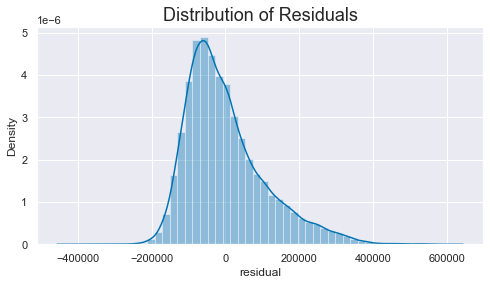

Residuals are not normally distributed


In [166]:
## Normality test

from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_S['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_S['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Pearson correlation coefficient matrix of each variables:
                             default       AGE  MARRIAGE  \
default                    1.000000  0.013890 -0.024339   
AGE                        0.013890  1.000000 -0.414170   
MARRIAGE                  -0.024339 -0.414170  1.000000   
EDUCATION_graduate school -0.051328 -0.100423  0.142129   
PAY_2                      0.263551 -0.050148  0.024199   
BILL_AMT5                 -0.006760  0.049345 -0.025393   
PAY_AMT6                  -0.053183  0.019478 -0.006641   

                           EDUCATION_graduate school     PAY_2  BILL_AMT5  \
default                                    -0.051328  0.263551  -0.006760   
AGE                                        -0.100423 -0.050148   0.049345   
MARRIAGE                                    0.142129  0.024199  -0.025393   
EDUCATION_graduate school                   1.000000 -0.169215   0.000941   
PAY_2                                      -0.169215  1.000000   0.221348   
BILL_A

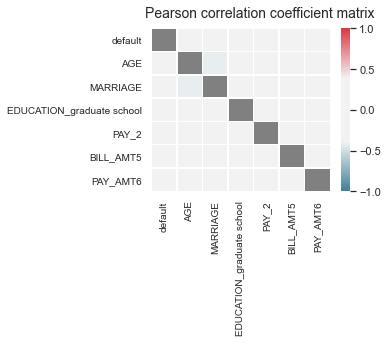

In [167]:
## Multicollinearity test


corr = df_S[['default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)


In [ ]:
## almost 0 correlation coefficient, means independent variable are not affecting one other 
## and that there is no multicollinearity in our data.

In [168]:
## Autocorrelation

from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_S['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9466529704375113
Little to no autocorrelation 

Assumption satisfied


In [ ]:
## Our model got a Durbin-Watson score of about 1.94 which is between 1.5 and 2.5, 
## so we can assume that there is no autocorrelation in our residual.

In [ ]:
## This assumes homoscedasticity, which is the same variance within our error terms. 
## Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. 
## To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

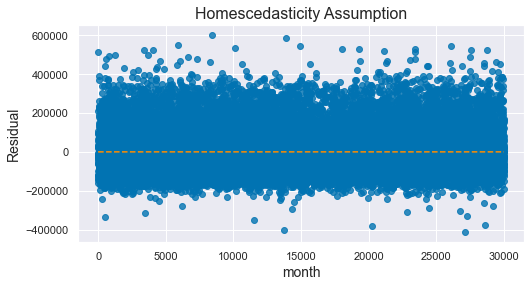

In [169]:
##Homoscedasticity test

# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_S.index, y=df_S.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_S.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

In [ ]:
##  assume that it satisfied the homoscedasticity assumption.

## after regression: r squared 0.3 -- not bad 
### line 158-159

In [170]:
df_S.head()

,credit,default,AGE,MARRIAGE,EDUCATION_graduate school,PAY_2,BILL_AMT5,PAY_AMT6,credit_pred,residual
0,20000,1,24,1,0,2,0,0,23701.992178,-3701.992178
1,120000,1,26,2,0,2,3455,2000,10328.008811,109671.991189
2,90000,0,34,2,0,0,14948,5000,116370.585478,-26370.585478
3,50000,0,37,1,0,0,28959,1000,147103.725210,-97103.725210
4,50000,0,57,1,0,0,19146,679,167553.697905,-117553.697905


In [175]:
df_S.head()

,credit,default,AGE,MARRIAGE,EDUCATION_graduate school,PAY_2,BILL_AMT5,PAY_AMT6,credit_pred,residual
0,20000,1,24,1,0,2,0,0,23701.992178,-3701.992178
1,120000,1,26,2,0,2,3455,2000,10328.008811,109671.991189
2,90000,0,34,2,0,0,14948,5000,116370.585478,-26370.585478
3,50000,0,37,1,0,0,28959,1000,147103.725210,-97103.725210
4,50000,0,57,1,0,0,19146,679,167553.697905,-117553.697905


## add variables to increase R squared

In [182]:
df = pd.read_csv('creditEDA.csv') 

In [183]:
df.head()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,3,0,0,0,1
1,120000,0,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,3,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,3,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,3,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,3,0,0,0,1


In [184]:
## add SEX
df_S = df[['credit', 'SEX','default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]

In [185]:
df_S.head()

,credit,SEX,default,AGE,MARRIAGE,EDUCATION_graduate school,PAY_2,BILL_AMT5,PAY_AMT6
0,20000,0,1,24,1,0,2,0,0
1,120000,0,1,26,2,0,2,3455,2000
2,90000,0,0,34,2,0,0,14948,5000
3,50000,0,0,37,1,0,0,28959,1000
4,50000,1,0,57,1,0,0,19146,679


In [186]:
X = df_S[['SEX','default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_S['credit'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 credit   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1670.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        02:31:04   Log-Likelihood:            -3.9024e+05
No. Observations:               30000   AIC:                         7.805e+05
Df Residuals:                   29991   BIC:                         7.806e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [187]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.3081770020939534


###  without SEX: 0.3078377586089446

In [188]:
df.head()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,3,0,0,0,1
1,120000,0,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,3,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,3,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,3,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,3,0,0,0,1


In [189]:
## add two education dummies
df_S = df[['credit', 'SEX','default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'EDUCATION_university', 'EDUCATION_high school', 
           'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]

In [190]:
df_S.head()

,credit,SEX,default,AGE,MARRIAGE,EDUCATION_graduate school,EDUCATION_university,EDUCATION_high school,PAY_2,BILL_AMT5,PAY_AMT6
0,20000,0,1,24,1,0,1,0,2,0,0
1,120000,0,1,26,2,0,1,0,2,3455,2000
2,90000,0,0,34,2,0,1,0,0,14948,5000
3,50000,0,0,37,1,0,1,0,0,28959,1000
4,50000,1,0,57,1,0,1,0,0,19146,679


In [191]:
X = df_S[['credit', 'SEX','default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'EDUCATION_university', 'EDUCATION_high school', 
           'PAY_2', 'BILL_AMT5', 'PAY_AMT6']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_S['credit'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 credit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.634e+32
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        02:33:27   Log-Likelihood:             6.1382e+05
No. Observations:               30000   AIC:                        -1.228e+06
Df Residuals:                   29988   BIC:                        -1.228e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [192]:
print('R2 score:', olsmod.rsquared)

R2 score: 1.0


In [193]:
df.head()

,credit,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,education,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,3,0,0,0,1
1,120000,0,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,3,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,3,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,3,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,3,0,0,0,1


# which features to keep for model buiding -- data for C2T3 

In [194]:
df_S.head()

,credit,SEX,default,AGE,MARRIAGE,EDUCATION_graduate school,EDUCATION_university,EDUCATION_high school,PAY_2,BILL_AMT5,PAY_AMT6
0,20000,0,1,24,1,0,1,0,2,0,0
1,120000,0,1,26,2,0,1,0,2,3455,2000
2,90000,0,0,34,2,0,1,0,0,14948,5000
3,50000,0,0,37,1,0,1,0,0,28959,1000
4,50000,1,0,57,1,0,1,0,0,19146,679


In [195]:
df_S.to_csv('creditML.csv', index = False)

In [196]:
df = pd.read_csv('creditML.csv') 

In [197]:
df.head()

,credit,SEX,default,AGE,MARRIAGE,EDUCATION_graduate school,EDUCATION_university,EDUCATION_high school,PAY_2,BILL_AMT5,PAY_AMT6
0,20000,0,1,24,1,0,1,0,2,0,0
1,120000,0,1,26,2,0,1,0,2,3455,2000
2,90000,0,0,34,2,0,1,0,0,14948,5000
3,50000,0,0,37,1,0,1,0,0,28959,1000
4,50000,1,0,57,1,0,1,0,0,19146,679


In [198]:
df['credit_pred'] = olsmod.predict(X)
df['residual'] = olsmod.resid
df.head()

,credit,SEX,default,AGE,MARRIAGE,EDUCATION_graduate school,EDUCATION_university,EDUCATION_high school,PAY_2,BILL_AMT5,PAY_AMT6,credit_pred,residual
0,20000,0,1,24,1,0,1,0,2,0,0,20000.0,2.037268e-10
1,120000,0,1,26,2,0,1,0,2,3455,2000,120000.0,1.600711e-10
2,90000,0,0,34,2,0,1,0,0,14948,5000,90000.0,3.929017e-10
3,50000,0,0,37,1,0,1,0,0,28959,1000,50000.0,4.074536e-10
4,50000,1,0,57,1,0,1,0,0,19146,679,50000.0,4.947651e-10


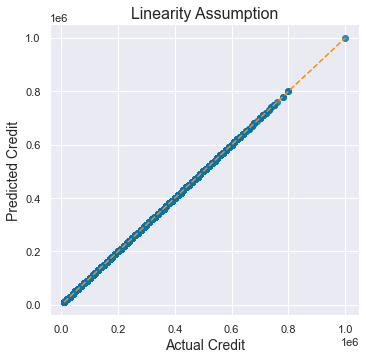

In [199]:
## Linearity test

# Plotting the observed vs predicted values
sns.lmplot(x='credit', y='credit_pred', data=df, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['credit', 'credit_pred']].min().min()-10, 
                        df[['credit', 'credit_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Credit', fontsize=14)
plt.xlabel('Actual Credit', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


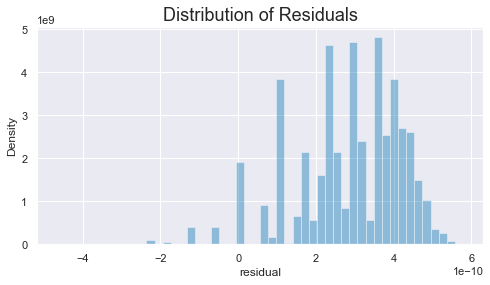

Residuals are not normally distributed


In [200]:
## Normality test

from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

In [201]:
df.columns

Index(['credit', 'SEX', 'default', 'AGE', 'MARRIAGE',
       'EDUCATION_graduate school', 'EDUCATION_university',
       'EDUCATION_high school', 'PAY_2', 'BILL_AMT5', 'PAY_AMT6',
       'credit_pred', 'residual'],
      dtype='object')

Pearson correlation coefficient matrix of each variables:
                                 SEX   default       AGE  MARRIAGE  \
SEX                        1.000000  0.039961  0.090874  0.031389   
default                    0.039961  1.000000  0.013890 -0.024339   
AGE                        0.090874  0.013890  1.000000 -0.414170   
MARRIAGE                   0.031389 -0.024339 -0.414170  1.000000   
EDUCATION_graduate school  0.022750 -0.051328 -0.100423  0.142129   
EDUCATION_university      -0.025353  0.036467 -0.077626 -0.051797   
EDUCATION_high school      0.007650  0.032403  0.231252 -0.110845   
PAY_2                      0.070771  0.263551 -0.050148  0.024199   
BILL_AMT5                  0.017005 -0.006760  0.049345 -0.025393   
PAY_AMT6                   0.002766 -0.053183  0.019478 -0.006641   

                           EDUCATION_graduate school  EDUCATION_university  \
SEX                                         0.022750             -0.025353   
default                  

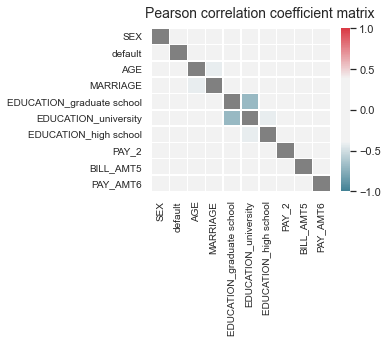

In [202]:
## Multicollinearity test


corr = df[['SEX','default', 'AGE', 'MARRIAGE', 'EDUCATION_graduate school', 'EDUCATION_university',
       'EDUCATION_high school','PAY_2', 'BILL_AMT5', 'PAY_AMT6']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)


In [203]:
## Autocorrelation

from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 0.36378410315693227
Signs of positive autocorrelation 

Assumption not satisfied


In [ ]:
## If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied
## If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied
## If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

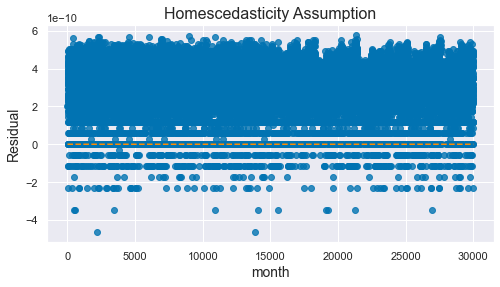

In [204]:
##Homoscedasticity test

# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df.index, y=df.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_S.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

In [ ]:
## guides
### 1. course site

### 2. the Titanic EDA example: https://github.com/TarekDib03/titanic-EDA/blob/master/Titanic%20-%20Project.ipynb

### 3. Multi-Linear Regression Using Python
### https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d 
### https://gist.github.com/rafiag

#### 4. Tutorial: Exploratory Data Analysis (EDA) with Categorical Variables |
#### https://github.com/hoffm386/eda-with-categorical-variables
###  https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

### 5. Pairplots in Python
#### https://github.com/WillKoehrsen/Data-Analysis/blob/master/pairplots/Pair%20Plots.ipynb

### 6. https://seaborn.pydata.org/generated/seaborn.lineplot.html